# Applying Logistic Regression and SVM

## scikit-learn refresher

In [1]:
import sklearn.datasets

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()

X, y = newsgroups.data, newsgroups.target

In [2]:
display(X.shape)
display(y.shape)

(11314, 130107)

(11314,)

In [3]:
X.head()

AttributeError: head not found

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X, y)
y_pred = knn_clf.predict(X)

In [ ]:
knn_clf.score(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

### Logistic Regression and SVM

In [ ]:
import sklearn.datasets
from sklearn.linear_model import LogisticRegression

X
lr = LogisticRegression()
lr.fit(wine.data, wine.target)
lr.score(wine.data, wine.target)

In [ ]:
lr.predict_proba(wine.data[:1])

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(wine.data, wine.target)
svc.score(wine.data, wine.target)

## Linear Classifiers

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def plot_4_classifiers(X, y, classifiers, titles):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
#    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]

    for clf, title, ax in zip(classifiers, titles, sub.flatten()):
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
#           xlabel=iris.feature_names[0],
#           ylabel=iris.feature_names[1],
        )
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    #plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

X = wine.data[wine.target<2][:, :2]
y = wine.target[wine.target<2]

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]
titles = ["Logistic Regression", "Linear SVC", "SVC", "KN Classifier"]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

In [ ]:
# Plot the classifiers
plot_4_classifiers(X, y, classifiers, titles)
fig.tight_layout()
plt.savefig('decision_boundaries.png', dpi=300, bbox_inches="tight")
plt.show()

# Loss Function

## Linear Classifiers: the coefficients

In [ ]:
# Minimizing a loss
from scipy.optimize import minimize
import numpy as np

minimize(np.square, 0).x

In [ ]:
minimize(np.square, 2).x

In [ ]:
import sklearn.datasets

from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [ ]:
from sklearn.linear_model import LinearRegression

#The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

## Loss function diagrams

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mathematical functions for logistic (Linear Classifier) and hinge (SVM) losses
def log_loss(raw_model_output):
   return np.log(1 + np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0, 1 - raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.xlabel('raw model output')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Implementing logistic regression

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using `scipy.optimize.minimize`. However, this time we'll minimize the logistic loss and compare with scikit-learn's `LogisticRegression` (we've set `C` to a large value to disable regularization; more on this in Chapter 3!).

The `log_loss()` function is already defined, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables `X` and `y`.

In [ ]:
import sklearn.datasets
from sklearn.preprocessing import StandardScaler, Normalizer

X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X = X[:,:10]
y = np.where(y, 1, -1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

# Logistic Regression

## Logistic Regression and regularization

In [ ]:
import pandas as pd

movies = pd.read_csv("datasets/movies.csv")
movies.head()

In [ ]:
movies.genre.value_counts()

In [ ]:
movies.info()

In [ ]:
movies["is_Action"] = movies["genre"].map({"Romance": 0, "Action": 1})
movies.head()

In [ ]:
from sklearn.model_selection import train_test_split

X = movies[["year", "rating"]].values
y = movies["is_Action"].values

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

lr_weak_reg = LogisticRegression(C=100)
lr_strong_reg = LogisticRegression(C=0.01)

lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

print(lr_weak_reg.score(X_train, y_train))
print(lr_strong_reg.score(X_train, y_train))

In [ ]:
print(lr_weak_reg.score(X_test, y_test))
print(lr_strong_reg.score(X_test, y_test))

In [ ]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X = X[:]
y = np.where(y, 1, -1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
lr_L1 = LogisticRegression(solver='liblinear', penalty='l1')
lr_L2 = LogisticRegression() # penalty = 'l2' by default

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

In [ ]:
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(lr_L1.coef_.flatten())
ax[0].set_xlabel("Feature Index")
ax[0].set_ylabel("Coefficient value")
ax[0].set_title("L1 Regularization")
ax[1].plot(lr_L2.coef_.flatten())
ax[1].set_xlabel("Feature Index")
ax[1].set_ylabel("Coefficient value")
ax[1].set_title("L2 Regularization")
plt.tight_layout()
fig.suptitle("L1 and L2 Regularization in a Logistic Regression Model", y=1.05, fontsize=15)
plt.savefig('L1_vs_L2_regularization.png', dpi=150)
plt.show()

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

1.0
0.9733333333333334


C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
X_train.shape
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=1, test_size=0.1, stratify=y_train)

In [8]:
# Regularized logistic Regression

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )

C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

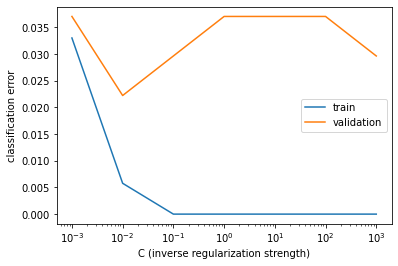

In [10]:
import matplotlib.pyplot as plt

# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.xlabel("C (inverse regularization strength)")
plt.ylabel("classification error")
plt.show()

### Logistic regression and feature selection

In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. We'll search for the best value of `C` using scikit-learn's `GridSearchCV()`.

In [2]:
import pandas as pd
movies = pd.read_csv("datasets/movie_reviews.csv")
movies.head()

,text,label
0,"This is a really bad film, with bad acting and...",0
1,MAJOR LEAGUE: BACK TO THE MINORS (1998) ½* St...,0
2,Gender Bender sexes things up a bit for the x-...,1
3,Several things become apparent after the first...,0
4,I really enjoyed this -- I'm a big fan of movi...,1


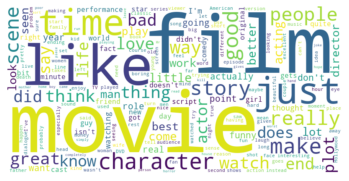

In [5]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

# Concatenate the text review data
reviews = " ".join(movies.text)

# Create the word cloud image
word_cloud = WordCloud(background_color="white", stopwords=ENGLISH_STOP_WORDS, width=800, height=400)

# Generate the word cloud using the review data
word_cloud.generate(reviews)

# Display the word cloud
plt.rcParams["figure.figsize"] = (12, 8)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Pre-processing the review text

To pre-process the text, we will use the term frequency-inverse document frequency, or TfIdf. TfIdf is a way of calculating the importance of words in a collection of different sets of text (or documents). TfIdf has the advantages of:

* Highlighting words that are common within a document but not across documents.
* Returning low scores for words common across all reviews (e.g., movie in movie reviews).
* Penalizing frequent words so we don't need to worry about stop words as much.

Fortunately, Scikit-Learn has a TfidfVectorizer class that can convert text data into a set of TfIdf features.

In [6]:
# Specify the word pattern
pattern = r"[a-zA-Z]+"

# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(token_pattern=pattern, stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=2500)

vect.fit(movies.text)

# Create sparse matrix from the vectorizer
tokenized_features = vect.transform(movies.text)

# Create a DataFrame of the new features
features = pd.DataFrame(tokenized_features.toarray(), columns=vect.get_feature_names_out())

features

,abandoned,ability,able,absolute,absolutely,academy,accent,accents,accept,accident,...,years old,yes,york,young,young man,younger,youth,zero,zombie,zombies
0,0.0,0.0,0.000000,0.0,0.053831,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.056862,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.102626,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Generate a number of different length metrics based on the text
movies["char_count"] = movies["text"].str.count(r"\S")
movies["word_count"] = movies["text"].str.count(pattern)
movies["avg_word_length"] = movies["char_count"] / movies["word_count"]

# Preview our new columns
movies.sample(3)

In [9]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define X and y
#X = pd.concat([features, movies.loc[:, "char_count":]], axis=1)
X = features.values
y = movies["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 2500
Number of selected features: 177


In [12]:
words = features.columns
words[100]

'art'

In [17]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=1)
lr.fit(X_train, y_train)

# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(words[inds_descending][i], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(words[inds_ascending][i], end=", ")
print("\n")

Most positive words: excellent, great, best, loved, realistic, 

Most negative words: worst, waste, bad, awful, terrible, 



## Logistic Regression and probabilities

Smaller values of `C` lead to less confident predictions. That's because smaller `C` means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!

In [18]:
prob = lr.predict_proba(X_train)
prob

array([[0.64676756, 0.35323244],
       [0.17866374, 0.82133626],
       [0.88198902, 0.11801098],
       ...,
       [0.7066831 , 0.2933169 ],
       [0.21152869, 0.78847131],
       [0.52459173, 0.47540827]])

In [19]:
prob.max()

0.9999590376227616

In [20]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)
lr.fit(X_train, y_train)
prob = lr.predict_proba(X_train)
np.max(prob)

0.9652650211376537

In [21]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=0.01)
lr.fit(X_train, y_train)
prob = lr.predict_proba(X_train)
np.max(prob)

0.5

C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 432x288 with 0 Axes>

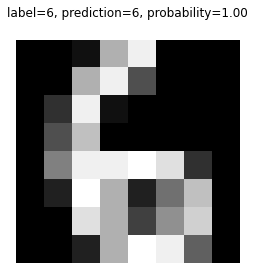

<Figure size 432x288 with 0 Axes>

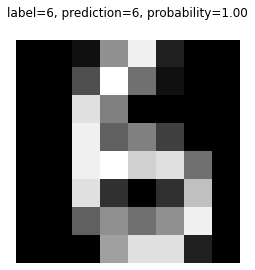

In [70]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def show_digit(index, estimator):
    label = digits.target[index]
    prediction = estimator.predict(digits.data[index].reshape(1, -1))[0]
    probability = lr.predict_proba(digits.data[index].reshape(1, -1)).flatten()[prediction]
    plt.gray()
    plt.matshow(digits.images[index])
    plt.axis("off")
    plt.title(f"{label=}, {prediction=}, {probability=:.2f}")
    plt.show()
    
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get predicted probabilities
proba = lr.predict_proba(X_train)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)


## Multiclass Logistic Regression

### Combining  binary classifiers with One-Vs-Rest

In [72]:
X, y = datasets.load_wine(return_X_y=True)

lr0 =LogisticRegression()
lr1 =LogisticRegression()
lr2 =LogisticRegression()

lr0.fit(X, y==0)
lr1.fit(X, y==1)
lr2.fit(X, y==2)

# get raw model output
display(lr0.decision_function(X)[0])
display(lr1.decision_function(X)[0])
display(lr2.decision_function(X)[0])

C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

5.863706623470522

-5.286607432184841

-7.575260385085432

In [74]:
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr.fit(X, y)
lr_ovr.predict(X)[0]

C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0

In [76]:
display(lr_ovr.coef_.shape)
display(lr_ovr.intercept_.shapepe)

(3, 13)

(3,)

In [78]:
lr_mnm = LogisticRegression(multi_class="multinomial")
lr_mnm.fit(X, y)
display(lr_mnm.coef_.shape)
display(lr_mnm.intercept_.shape)

C:\Users\diani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(3, 13)

(3,)

In [79]:
lr0.coef_.shape

(1, 13)

In [84]:
import warnings
warnings.filterwarnings('ignore')

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr.fit(X_train, y_train)
print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

lr_mnm = LogisticRegression(multi_class='multinomial')
lr_mnm.fit(X_train, y_train)
print("Softmax training accuracy:", lr_mnm.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mnm.score(X_test, y_test))

OVR training accuracy: 0.9925760950259837
OVR test accuracy    : 0.9622222222222222
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9666666666666667


# Support Vector Machines

## Support Vectors

### Effect of removing examples

Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into `X` and `y` (first two features only). (Note: we specify `lims` in `plot_classifier()` so that the two plots are forced to use the same axis limits and can be compared directly.)

In [102]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

wine = datasets.load_wine()
X, y = wine.data[:,:2], wine.target

def plot_classifier(X, y, classifier):
    # Set-up 2x2 grid for plotting.
    fig, ax = plt.subplots()
#    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]

#    for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
#           xlabel=iris.feature_names[0],
#           ylabel=iris.feature_names[1],
        )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
#    ax.set_title(title)
    plt.xlim([11, 15])
    plt.ylim([0, 6])
    plt.show()

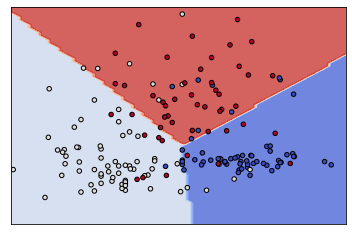

Number of original examples 178
Number of support vectors 81


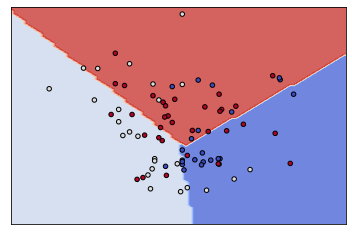

In [103]:
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm)

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small)

## Kernel SVMs

### GridSearchCV warm-up

In the video we saw that increasing the `RBF kernel` hyperparameter `gamma` increases training accuracy. In this exercise we'll search for the gamma that maximizes cross-validation accuracy using scikit-learn's GridSearchCV. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables X and y.

In [105]:
X = digits.data
y = digits.target == 2

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


Larger values of `gamma` are better for training accuracy, but cross-validation helped us find something different (and better!).

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 1.0
Test accuracy of best grid search hypers: 1.0


 Note that the best value of `gamma`, 0.0001, is different from the value of 0.001 that we got in the previous exercise, when we fixed `C=1`. Hyperparameters can affect each other!

## Comparing logistic regression and SVM (and beyond)

`SGDClassifier`: scales well to large datasets

logistic regression: `SGDClassifier(loss='log_loss')`
linear SVM: `SGDClassifier(loss='hinge')`

Note: `SGDClassifier` hyperparameter `alpha`is like `1/C`

In [109]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log_loss']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 1, 'loss': 'hinge'}
Best CV accuracy 0.9977777777777778
Test accuracy of best grid search hypers: 0.9933333333333333
